In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, ttest_ind
from scipy.stats import mannwhitneyu
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import seaborn as sns

#### load Data

In [2]:
df_merged_2020 =pd.read_csv('features_sentiment_2020.csv')
df_merged_2021 = pd.read_csv('features_sentiment_2021.csv')

In [3]:
positive_features_2020 = df_merged_2020 [df_merged_2020 ['Sentiment'] == 'positive']
negative_features_2020 = df_merged_2020 [df_merged_2020 ['Sentiment'] == 'negative']
positive_features_2021 = df_merged_2021[df_merged_2021['Sentiment'] == 'positive']
negative_features_2021 = df_merged_2021[df_merged_2021['Sentiment'] == 'negative']

In [4]:
features = positive_features_2021.columns
features =list(features)
remove_set = ['Unnamed: 0','company', 'year', 'sentence', 'language',"Sentiment"]
features = [item for item in features if item not in remove_set]

#### The relationship between News towards companies and their sustainability reports 2020

In [5]:
# alpha is defined 
alpha = 0.05

# Initialize an empty list to store the results
results = []

# Iterate over each feature
for feature in features:
    positive_values = positive_features_2020[feature]
    negative_values = negative_features_2020[feature]
    
    # Convert values to lists and then to numpy arrays
    positive_values = np.array(positive_values.tolist(), dtype=float)
    negative_values = np.array(negative_values.tolist(), dtype=float)

    # Calculate mean and standard deviation for positive firms
    mean_positive = np.mean(positive_values)
    std_positive = np.std(positive_values, ddof=1) 

    # Calculate mean and standard deviation for negative firms 
    mean_negative = np.mean(negative_values)
    std_negative = np.std(negative_values, ddof=1)
    
    # Perform Shapiro-Wilk tests
    stat1, p_value1 = shapiro(positive_values)
    stat2, p_value2 = shapiro(negative_values)
    
    # Initialize variables for t-test or Mann-Whitney U test
    t_stat = None
    t_p_value = None
    
    # Check normality assumption and perform tests accordingly
    if p_value1 > alpha and p_value2 > alpha:
        t_stat, t_p_value = ttest_ind(positive_values, negative_values)
    else:
        t_stat, t_p_value = mannwhitneyu(positive_values, negative_values)
    
    # Determine significance
    significance = "Significant" if t_p_value < alpha else "Not Significant"
    
    # Store the results in the list
    results.append({
        'Feature': feature,
        'Mean (Positive)':round(mean_positive, 2),
        'SD (Positive)': round(std_positive, 2),
        'Mean (Negative)':  round(mean_negative, 2),
        'SD (Negative)': round(std_negative, 2),
        'Normality': (p_value1 > alpha and p_value2 > alpha),
        'T_Statistic':round(t_stat, 2),
        'P_Value':round(t_p_value, 2),
        'Significance': significance
    })

# Create a DataFrame from the results list
results_df_2020 = pd.DataFrame(results)

# Print or further analyze the results DataFrame
results_df_2020
#results_df_2020.to_csv('t_test_results_2020.csv', sep=';', index=False)


,Feature,Mean (Positive),SD (Positive),Mean (Negative),SD (Negative),Normality,T_Statistic,P_Value,Significance
0,WC,31166.44,22139.35,34275.60,35211.87,False,360.00,0.71,Not Significant
1,WPS,27.23,20.57,23.13,3.88,False,332.00,0.93,Not Significant
2,i,0.06,0.10,0.05,0.05,False,316.00,0.72,Not Significant
3,we,2.48,1.54,2.62,1.55,True,-0.31,0.76,Not Significant
4,ipron,2.28,0.44,2.27,0.44,False,356.00,0.76,Not Significant
5,number,3.33,1.27,3.55,0.62,False,258.00,0.18,Not Significant
6,conj,6.84,1.70,6.96,1.54,False,340.00,0.97,Not Significant
7,negate,0.34,0.19,0.39,0.11,False,220.50,0.05,Significant
8,quantity,3.51,1.07,3.83,1.10,False,278.00,0.31,Not Significant
9,tentat,0.98,0.28,1.14,0.35,False,262.00,0.20,Not Significant


#### Visualizing Correlation between Public Opinion and Sustainability Report Features 2020

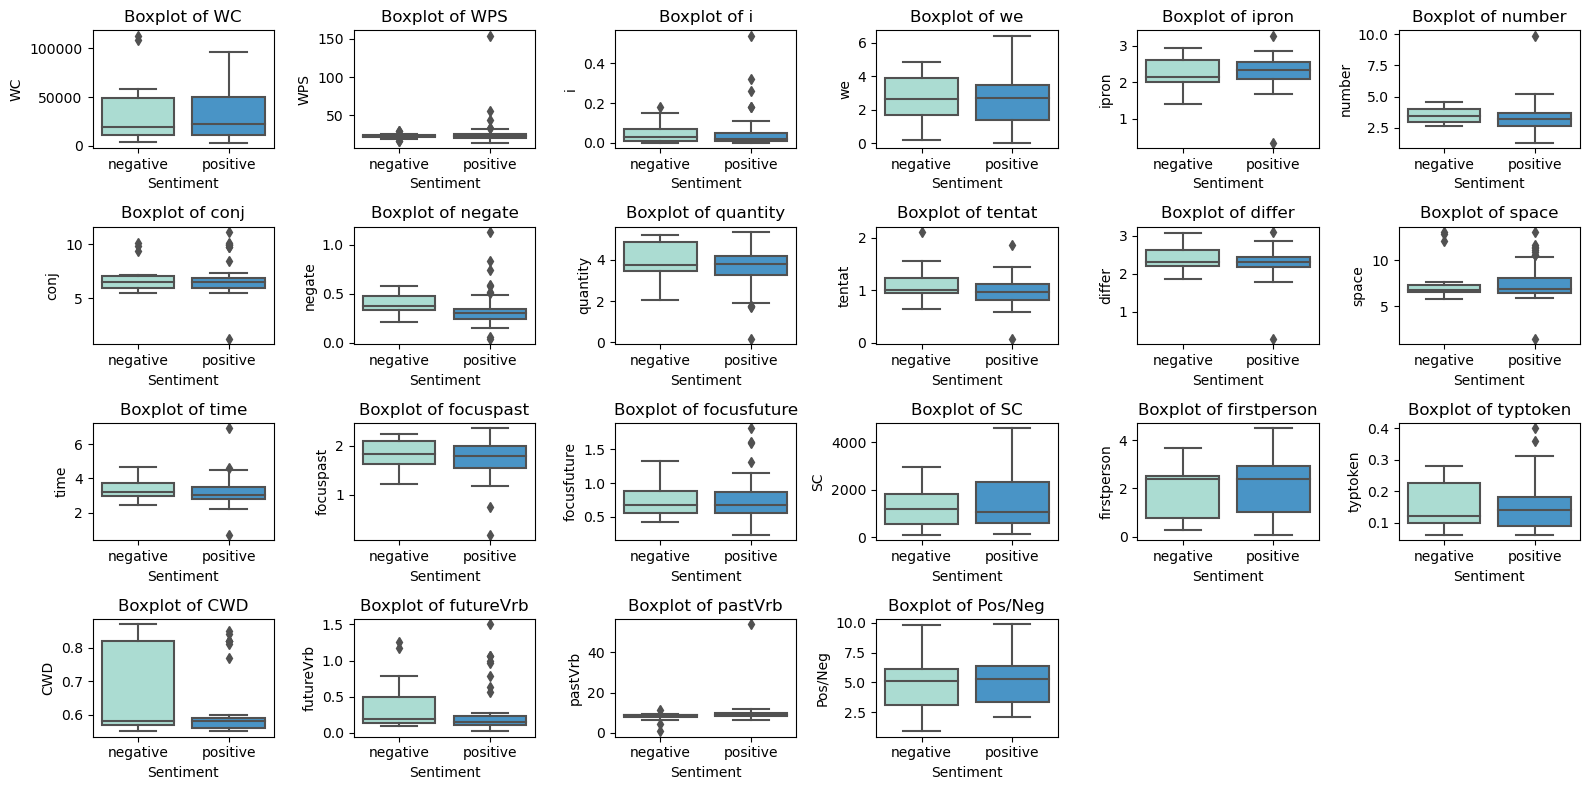

In [6]:
# List of columns to exclude from the analysis
columns_to_exclude = ['Unnamed: 0','company', 'year', 'sentence', 'language']
# Dropping the specified columns from the dataframe 'df_merged_2020'
correlation_2020 = df_merged_2020.drop(columns=columns_to_exclude)

# Setting up the dimensions of the figure for plotting
plt.figure(figsize=(16, 8))

# Looping through each column in the dataframe except the first one
for i, feature in enumerate(correlation_2020.columns[1:]):
    # Creating a subplot in a 4x6 grid for each feature
    plt.subplot(4, 6, i + 1)
    # Defining a pastel color palette for the plots
    pastel_palette = ["#a3e4d7", "#3498db"]
    # Creating a boxplot with 'Sentiment' on x-axis and current feature on y-axis
    sns.boxplot(x="Sentiment", y=feature, data=correlation_2020, palette=pastel_palette)
    # Adding a title to each subplot with the feature name
    plt.title(f"Boxplot of {feature}")
    # Adjusting the layout so there's no overlap between subplots
    plt.tight_layout()

# Uncomment the following line to save the figure as an image file
# plt.savefig("Boxplot_all_features_2020")

# Displaying the figure with all subplots
plt.show()


#### The relationship between News towards companies and their sustainability reports 2021

In [7]:
#alpha is defined
alpha = 0.05

# Initialize an empty list to store the results
results = []

# Iterate over each feature
for feature in features:
    positive_values = positive_features_2021[feature]
    negative_values = negative_features_2021[feature]
    
    # Convert values to lists and then to numpy arrays
    positive_values = np.array(positive_values.tolist(), dtype=float)
    negative_values = np.array(negative_values.tolist(), dtype=float)

    # Calculate mean and standard deviation for positive firms
    mean_positive = np.mean(positive_values)
    std_positive = np.std(positive_values, ddof=1) 

    # Calculate mean and standard deviation for negative firms 
    mean_negative = np.mean(negative_values)
    std_negative = np.std(negative_values, ddof=1)
    
    # Perform Shapiro-Wilk tests
    stat1, p_value1 = shapiro(positive_values)
    stat2, p_value2 = shapiro(negative_values)
    
    # Initialize variables for t-test or Mann-Whitney U test
    t_stat = None
    t_p_value = None
    
    # Check normality assumption and perform tests accordingly
    if p_value1 > alpha and p_value2 > alpha:
        t_stat, t_p_value = ttest_ind(positive_values, negative_values)
    else:
        t_stat, t_p_value = mannwhitneyu(positive_values, negative_values)
    
    # Determine significance
    significance = "Significant" if t_p_value < alpha else "Not Significant"
    
    # Store the results in the list
    results.append({
        'Feature': feature,
        'Mean (Positive)':round(mean_positive, 2),
        'SD (Positive)': round(std_positive, 2),
        'Mean (Negative)':  round(mean_negative, 2),
        'SD (Negative)': round(std_negative, 2),
        'Normality': (p_value1 > alpha and p_value2 > alpha),
        'T_Statistic':round(t_stat, 2),
        'P_Value':round(t_p_value, 2),
        'Significance': significance
    })

# Create a DataFrame from the results list
results_df_2021 = pd.DataFrame(results)

# Print or further analyze the results DataFrame
results_df_2021
#results_df_2021.to_csv('t_test_results_2021.csv', sep=';', index=False)


,Feature,Mean (Positive),SD (Positive),Mean (Negative),SD (Negative),Normality,T_Statistic,P_Value,Significance
0,WC,34787.33,26918.46,40194.93,40093.58,False,335.00,0.97,Not Significant
1,WPS,24.55,6.43,24.11,3.71,False,329.50,0.90,Not Significant
2,i,0.10,0.24,0.08,0.12,False,275.50,0.29,Not Significant
3,we,2.62,1.66,2.63,1.40,True,-0.03,0.98,Not Significant
4,ipron,2.38,0.41,2.20,0.50,True,1.36,0.18,Not Significant
5,number,3.43,0.87,3.90,0.92,False,233.00,0.08,Not Significant
6,conj,7.07,1.61,6.61,1.37,False,378.00,0.49,Not Significant
7,negate,0.34,0.17,0.36,0.12,False,278.00,0.31,Not Significant
8,quantity,3.56,1.00,3.99,1.04,False,268.00,0.24,Not Significant
9,tentat,1.01,0.27,1.02,0.28,False,301.00,0.54,Not Significant


#### Visualizing Correlation between Public Opinion and Sustainability Report Features 2021

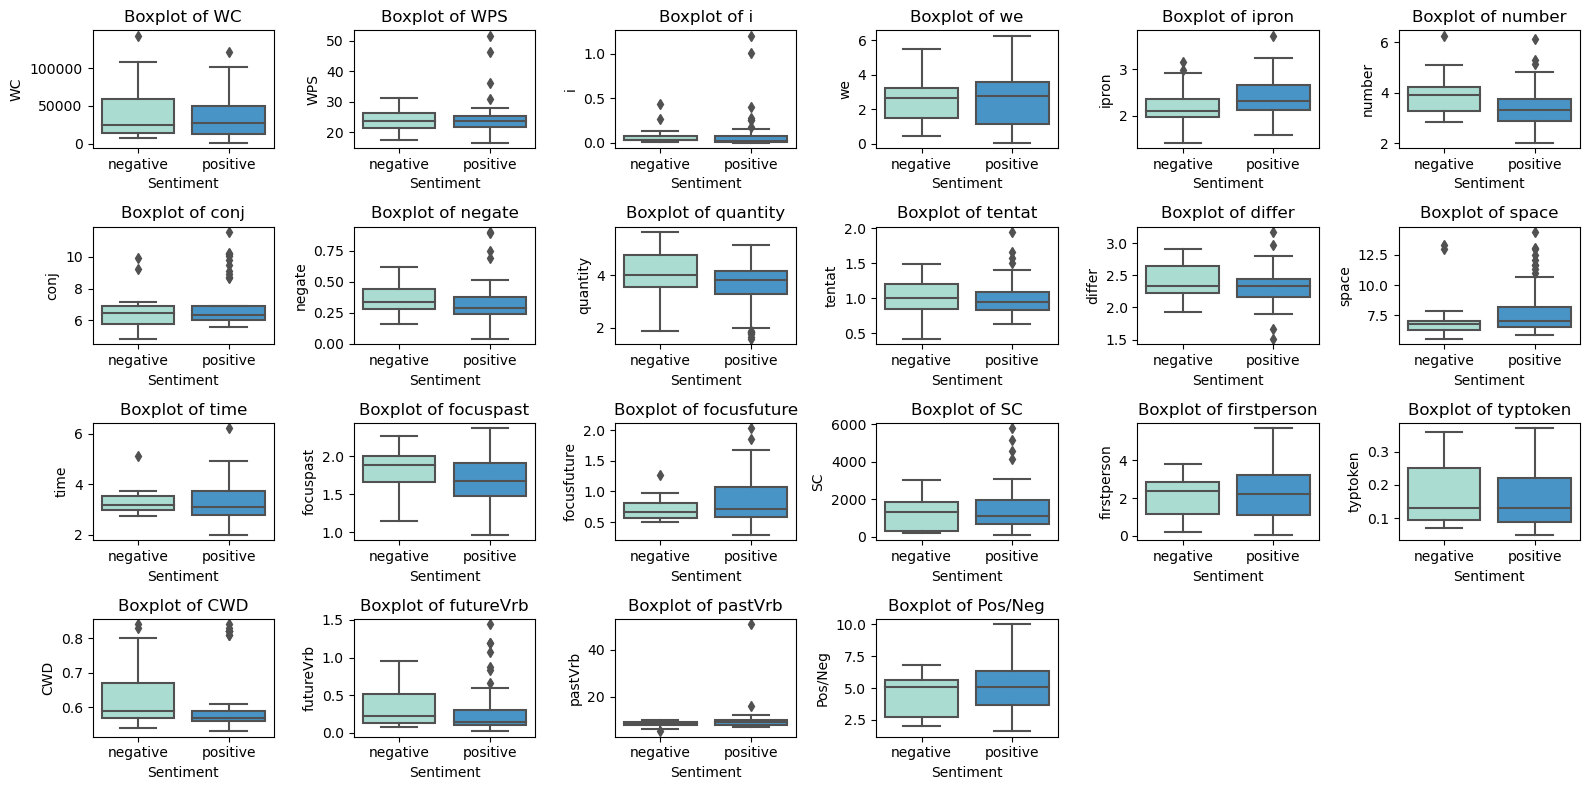

In [8]:
# List of columns to exclude from the analysis
columns_to_exclude = ['Unnamed: 0','company', 'year', 'sentence', 'language']
# Dropping the specified columns from the dataframe 'df_merged_2021'
correlation_2021 = df_merged_2021.drop(columns=columns_to_exclude)

# Setting up the dimensions of the figure for plotting
plt.figure(figsize=(16, 8))

# Looping through each column in the dataframe except the first one
for i, feature in enumerate(correlation_2021.columns[:-1]):
    # Creating a subplot in a 4x6 grid for each feature
    plt.subplot(4, 6, i + 1)
    # Defining a pastel color palette for the plots
    pastel_palette = ["#a3e4d7", "#3498db"]
    # Creating a boxplot with 'Sentiment' on x-axis and current feature on y-axis
    sns.boxplot(x="Sentiment", y=feature, data=correlation_2021, palette=pastel_palette)
    # Adding a title to each subplot with the feature name
    plt.title(f"Boxplot of {feature}")
    # Adjusting the layout so there's no overlap between subplots
    plt.tight_layout()

# Uncomment the following line to save the figure as an image file
# plt.savefig("Boxplot_all_features_2021")

# Displaying the figure with all subplots
plt.show()

#### The relationship between News towards companies and their sustainability reports (difference 2021/2020)

In [9]:
positive_features_2020_dif = df_merged_2020[df_merged_2021['Sentiment'] == 'positive']
negative_features_2020_dif = df_merged_2020[df_merged_2021['Sentiment'] == 'negative']

In [10]:
#alpha is defined 
alpha = 0.05

# Initialize an empty list to store the results
results = []

# Iterate over each feature
for feature in features:
    positive_values = positive_features_2021[feature]- positive_features_2020_dif[feature]
    negative_values = negative_features_2021[feature]- negative_features_2020_dif[feature]
    
    # Convert values to lists and then to numpy arrays
    positive_values = np.array(positive_values.tolist(), dtype=float)
    negative_values = np.array(negative_values.tolist(), dtype=float)

    # Calculate mean and standard deviation for positive firms
    mean_positive = np.mean(positive_values)
    std_positive = np.std(positive_values, ddof=1) 

    # Calculate mean and standard deviation for negative firms 
    mean_negative = np.mean(negative_values)
    std_negative = np.std(negative_values, ddof=1)
    
    # Perform Shapiro-Wilk tests
    stat1, p_value1 = shapiro(positive_values)
    stat2, p_value2 = shapiro(negative_values)
    
    # Initialize variables for t-test or Mann-Whitney U test
    t_stat = None
    t_p_value = None
    
    # Check normality assumption and perform tests accordingly
    if p_value1 > alpha and p_value2 > alpha:
        t_stat, t_p_value = ttest_ind(positive_values, negative_values)
    else:
        t_stat, t_p_value = mannwhitneyu(positive_values, negative_values)
    
    # Determine significance
    significance = "Significant" if t_p_value < alpha else "Not Significant"
    
    # Store the results in the list
    results.append({
        'Feature': feature,
        'Mean (Positive)':round(mean_positive, 2),
        'SD (Positive)': round(std_positive, 2),
        'Mean (Negative)':  round(mean_negative, 2),
        'SD (Negative)': round(std_negative, 2),
        'Normality': (p_value1 > alpha and p_value2 > alpha),
        'T_Statistic':round(t_stat, 2),
        'P_Value':round(t_p_value, 2),
        'Significance': significance
    })

# Create a DataFrame from the results list
results_df_diff = pd.DataFrame(results)

# Print or further analyze the results DataFrame
results_df_diff
#results_df_diff.to_csv('t_test_results_diff.csv', sep=';', index=False)


,Feature,Mean (Positive),SD (Positive),Mean (Negative),SD (Negative),Normality,T_Statistic,P_Value,Significance
0,WC,3620.89,13967.03,5919.33,14970.86,False,315.00,0.71,Not Significant
1,WPS,-2.68,19.69,0.98,2.57,False,278.00,0.31,Not Significant
2,i,0.05,0.20,0.03,0.11,False,363.50,0.66,Not Significant
3,we,0.14,0.83,0.01,0.65,False,326.50,0.86,Not Significant
4,ipron,0.10,0.48,-0.07,0.39,False,378.50,0.49,Not Significant
5,number,0.09,1.07,0.35,0.46,False,236.00,0.08,Not Significant
6,conj,0.23,1.82,-0.35,1.04,False,416.00,0.18,Not Significant
7,negate,0.00,0.15,-0.03,0.12,False,390.50,0.37,Not Significant
8,quantity,0.05,0.81,0.16,0.74,False,310.50,0.65,Not Significant
9,tentat,0.03,0.27,-0.11,0.28,False,433.50,0.10,Not Significant


#### Visualizing Correlation between Public Opinion and the Difference of Sustainability Report Features 2021-2020

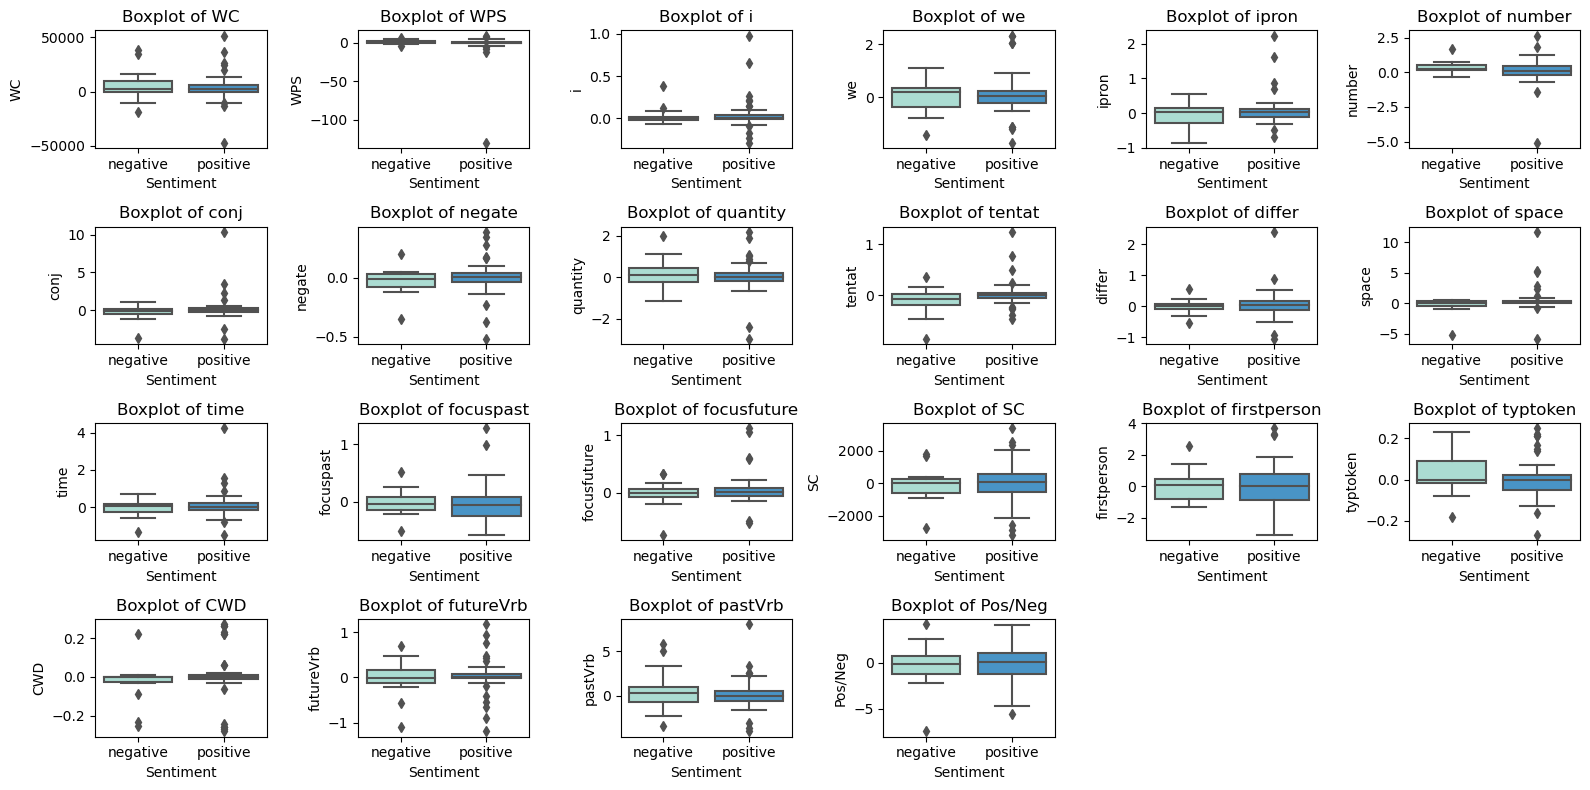

In [12]:
correlation_difference = correlation_2021.drop(columns=["Sentiment"]) - correlation_2020.drop(columns=["Sentiment"])
correlation_difference["Sentiment"]=correlation_2021["Sentiment"]
# Setting up the dimensions of the figure for plotting
plt.figure(figsize=(16, 8))

# Looping through each column in the dataframe except the first one

for i, feature in enumerate(correlation_difference.columns[:-1]):
    # Creating a subplot in a 4x6 grid for each feature
    plt.subplot(4, 6, i + 1)
    # Defining a pastel color palette for the plots
    pastel_palette = ["#a3e4d7", "#3498db"]
    # Creating a boxplot with 'Sentiment' on x-axis and current feature on y-axis
    sns.boxplot(x="Sentiment", y=feature, data=correlation_difference, palette=pastel_palette)
    # Adding a title to each subplot with the feature name
    plt.title(f"Boxplot of {feature}")
    # Adjusting the layout so there's no overlap between subplots
    plt.tight_layout()

# Uncomment the following line to save the figure as an image file
# plt.savefig("Boxplot_all_features_diff")

# Displaying the figure with all subplots
plt.show()

